In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from torch.nn import Softplus #smooth relu
import torch.nn as nn
import torch.nn.functional as F
from utils import generate_polynomial_data
import numpy as np
import torch
import torch.optim as optim
from torch.nn import MSELoss, BCELoss
from tqdm import tqdm

from model import Net, check_loss_landscape

import matplotlib.pyplot as plt

/home/cwang506/.conda/envs/torch-env/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [8]:
torch.manual_seed(0)
suffix = "1"

n = 2000
d = 10000
generate_data = False

coeffs = -1+2*np.random.rand(d, 1)
xvals = -1+2*np.random.rand(n)
if generate_data:
    print("Generating Data...")
    X, Y = generate_polynomial_data(coeffs, xvals)
    #make categorical
    inds_pos = np.where(Y>0)
    inds_neg = np.where(Y<=0)
#     print(Y)
    Y[inds_pos] = 1
    Y[inds_neg] = 0
    
    with open("./datasets/X_categorical_%s.npy" %suffix, "wb") as f:
        np.save(f, X)
    with open("./datasets/Y_categorical_%s.npy" %suffix, "wb") as f:
        np.save(f, Y)
    with open("./datasets/coeffs_categorical_%s.npy" %suffix, "wb") as f:
        np.save(f, coeffs)
    
else:
    with open("./datasets/X_categorical_%s.npy" %suffix, "rb") as f:
        X = np.load(f)
    with open("./datasets/Y_categorical_%s.npy" %suffix, "rb") as f:
        Y = np.load(f)
    with open("./datasets/coeffs_categorical_%s.npy" %suffix, "rb") as f:
        coeffs = np.load(f)

In [9]:
#subsample to get 50/50 split
inds_pos = np.where(Y==1)[0]
inds_neg = np.where(Y==0)[0]
pos = np.random.choice(inds_pos, size=int(700))
neg = np.random.choice(inds_neg, size=int(700))
data_inds = np.concatenate([pos, neg])
data_inds.sort()
X, Y = X[data_inds], Y[data_inds]

Running on GPU
Running on GPU


  0%|          | 3/2000 [00:00<01:17, 25.63it/s]

Epoch 1 iteration 2000 loss: 69965.5


  0%|          | 3/2000 [00:00<01:15, 26.38it/s]

Epoch 2 iteration 2000 loss: 70000.0


  0%|          | 4/2000 [00:00<01:07, 29.62it/s]

Epoch 3 iteration 2000 loss: 70000.0


  0%|          | 4/2000 [00:00<01:05, 30.26it/s]

Epoch 4 iteration 2000 loss: 70000.0


  0%|          | 4/2000 [00:00<01:07, 29.70it/s]

Epoch 5 iteration 2000 loss: 70000.0


  0%|          | 3/2000 [00:00<01:07, 29.37it/s]

Epoch 6 iteration 2000 loss: 70000.0


  0%|          | 3/2000 [00:00<01:16, 26.25it/s]

Epoch 7 iteration 2000 loss: 70000.0


  0%|          | 4/2000 [00:00<01:07, 29.74it/s]

Epoch 8 iteration 2000 loss: 70000.0


  0%|          | 3/2000 [00:00<01:08, 29.03it/s]

Epoch 9 iteration 2000 loss: 70000.0


100%|██████████| 2000/2000 [01:10<00:00, 28.20it/s]


Epoch 10 iteration 2000 loss: 70000.0
[69965.49990637208, 70000.0, 70000.0, 70000.0, 70000.0, 70000.0, 70000.0, 70000.0, 70000.0, 70000.0]


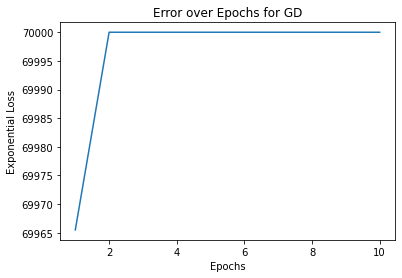

In [10]:
torch.manual_seed(0)
suffix += "small_params"

sgd = False
train = True

if sgd:
    model_path = "./models/model_sgd_categorical_%s.pt"%suffix
    net = Net(d, epochs = 50, loss = BCELoss(reduction="sum"), categorical =True)
else:
    model_path = "./models/model_categorical_%s.pt"%suffix
    net = Net(d, epochs = 10, loss = BCELoss(reduction="sum"), categorical = True)
    
if train:
    usegpu=True
    if torch.cuda.is_available() and usegpu:
        device = torch.device("cuda:0")
        print("Running on GPU")
    else:
        device = torch.device("cpu")
    net.to(device)
    if sgd:
        net.train_sgd(X, Y, 100000, lr = 1e-2)
    else:
        net.train_gd(X, Y, 2000, lr = 1e-3, usegpu = usegpu)
    torch.save(net.state_dict(), model_path)

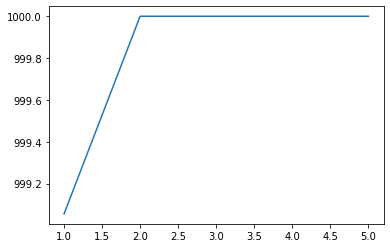

In [19]:
import matplotlib
matplotlib.rc("axes.formatter", useoffset=False)
plt.plot([1, 2, 3, 4, 5], [999.0548351716996, 1000.0, 1000.0, 1000.0, 1000.0])
# plt.ylim(999, 1000.5)

True


/home/cwang506/.conda/envs/torch-env/lib/python3.8/site-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Overall loss: tensor(10000., grad_fn=<BinaryCrossEntropyBackward>)
0.0 1.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0

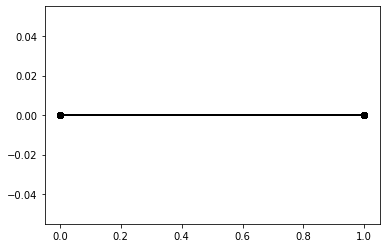

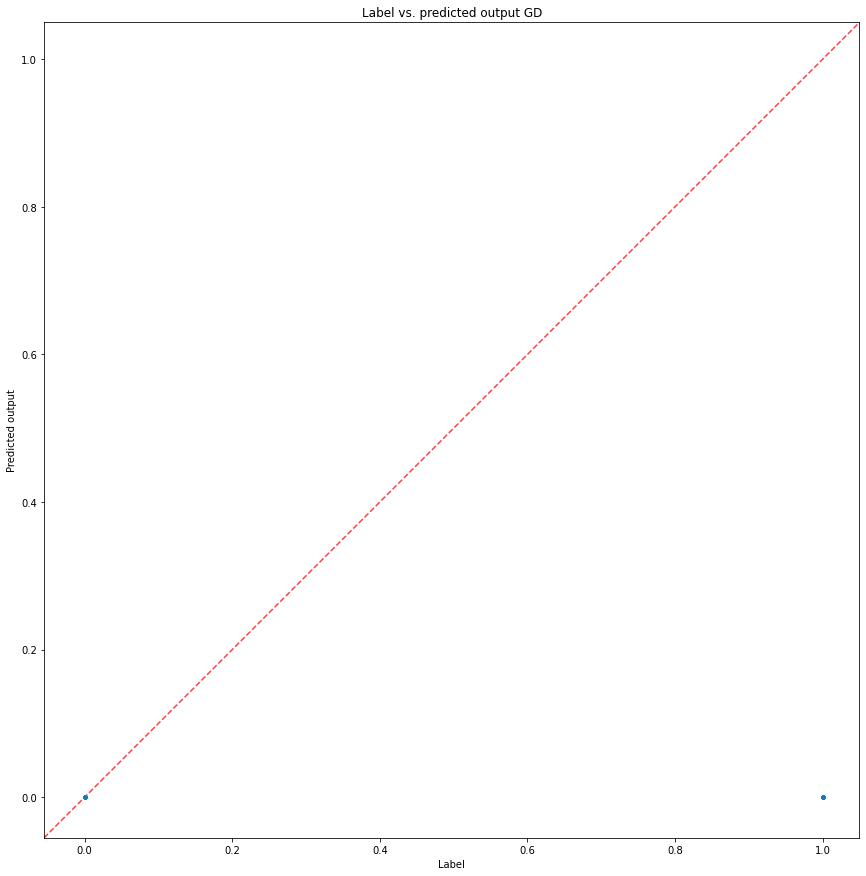

In [27]:
check_loss_landscape(model_path, X, Y, sgd=False, loss_function=BCELoss(reduction="sum"), categorical=True)

In [5]:
torch.cuda.is_available()

True

In [8]:
torch.cuda.get_device_name()

'Tesla K80'